# WeatherPy
----

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time as time
import random
import json
import requests as req
#import seaborn as sns

# Import API key
from config2 import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Generating Cities List

### Perform API Calls
* Performing weather check on each city using a series of successive API calls.
* Including a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
data= pd.DataFrame(columns =["Lat","Lng","Temperature","Humidity","Clouds","Wind Speed"])
Lat = []
Lng = []
for x in range(0, 550):
    Lat.append(random.uniform(-90, 90))
    Lng.append(random.uniform(-181, 181))
data["Lat"] = Lat
data["Lng"] = Lng
data.head()

,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,81.883671,46.800976,NaN,NaN,NaN,NaN
1,83.172861,-173.516004,NaN,NaN,NaN,NaN
2,-78.409478,-130.044666,NaN,NaN,NaN,NaN
3,-31.542316,36.867546,NaN,NaN,NaN,NaN
4,-55.433717,25.460490,NaN,NaN,NaN,NaN


In [30]:
#cities
cities =[]
for index, row in data.iterrows():
    city = citipy.nearest_city(row["Lat"], row["Lng"])
    cities.append(city.city_name)
data["City"] = cities
data.head()

,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed,City
0,81.883671,46.800976,NaN,NaN,NaN,NaN,belushya guba
1,83.172861,-173.516004,NaN,NaN,NaN,NaN,mys shmidta
2,-78.409478,-130.044666,NaN,NaN,NaN,NaN,rikitea
3,-31.542316,36.867546,NaN,NaN,NaN,NaN,richards bay
4,-55.433717,25.460490,NaN,NaN,NaN,NaN,kruisfontein


In [31]:
len(data)

550

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
Lat            550 non-null float64
Lng            550 non-null float64
Temperature    0 non-null object
Humidity       0 non-null object
Clouds         0 non-null object
Wind Speed     0 non-null object
City           550 non-null object
dtypes: float64(2), object(5)
memory usage: 30.2+ KB


In [33]:
#Checking duplicate values 
data.Lat.duplicated().sum()

0

In [34]:
#Checking duplicate values 
data.Lng.duplicated().sum()

0

In [39]:
#Counter

row_count = 0

# Creating columns for the fields.

data["Temperature"] = ""
data["Humidity"] = ""
data["Clouds"] = ""
data["Wind Speed"] = ""

# Looping through and get the weather data using the Open Weather API.

for index, row in data.iterrows():
    #Sleep to help with the call limit
    
    time.sleep(1)
    
    # Getting weather data.
    
    url = "https://api.openweathermap.org/data/2.5/weather?"
    units = "Imperial"
    
    query_url = url + "lat="+ str(row["Lat"]) + "&lon=" + str(row["Lng"]) + "&appid=" + api_key + "&units=" + units
    #Print log to ensure the loop is working correctly.
    
    print("Retieving city # " + str(row_count))
    print(query_url)
    row_count += 1
    
    #Grabbing jason data from  requested URL
    
    city_weather = requests.get(query_url).json()

    
    #Append the weather data to the appropriate columns.
    #try/except to skip any cities with errors.
    
    data.append((requests.get(query_url + str(city_weather)).json()), ignore_index=True)
    try:
        temperature = city_weather["main"]["temp"]
        humidity = city_weather["main"]["humidity"]
        clouds = city_weather["clouds"]["all"]
        wind_speed = city_weather["wind"]["speed"]
        
        data.set_value(index, "Temperature", temperature)
        data.set_value(index,"Humidity", humidity)
        data.set_value(index,"Clouds", clouds)
        data.set_value(index,"Wind Speed", wind_speed)
    except:
        print("Error with weather data, skipping.")


Retieving city # 0
https://api.openweathermap.org/data/2.5/weather?lat=81.8836705801144&lon=46.80097570555495&appid=1ddaf8dba067f0ef8bcf4a37a46d962c&units=Imperial


C:\Users\Sisay\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Sisay\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Sisay\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Sisay\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Retieving city # 1
https://api.openweathermap.org/data/2.5/weather?lat=83.1728607529977&lon=-173.51600408541722&appid=1ddaf8dba067f0ef8bcf4a37a46d962c&units=Imperial
Retieving city # 2
https://api.openweathermap.org/data/2.5/weather?lat=-78.40947789351868&lon=-130.04466566020366&appid=1ddaf8dba067f0ef8bcf4a37a46d962c&units=Imperial
Retieving city # 3
https://api.openweathermap.org/data/2.5/weather?lat=-31.542316110917966&lon=36.86754595600067&appid=1ddaf8dba067f0ef8bcf4a37a46d962c&units=Imperial
Retieving city # 4
https://api.openweathermap.org/data/2.5/weather?lat=-55.43371680440731&lon=25.460490289455976&appid=1ddaf8dba067f0ef8bcf4a37a46d962c&units=Imperial
Retieving city # 5
https://api.openweathermap.org/data/2.5/weather?lat=-71.74942510594447&lon=147.39313428164792&appid=1ddaf8dba067f0ef8bcf4a37a46d962c&units=Imperial
Retieving city # 6
https://api.openweathermap.org/data/2.5/weather?lat=6.635601601575203&lon=-0.20993425757563955&appid=1ddaf8dba067f0ef8bcf4a37a46d962c&units=Imperi

### Plotting the Data


In [41]:
data.head()


,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed,City
0,81.883671,46.800976,16.07,86,64,10.67,belushya guba
1,83.172861,-173.516004,-7.16,76,44,17.16,mys shmidta
2,-78.409478,-130.044666,-28.94,37,12,3.85,rikitea
3,-31.542316,36.867546,73.04,100,0,13.47,richards bay
4,-55.433717,25.460490,34.43,100,80,15.03,kruisfontein


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
Lat            550 non-null float64
Lng            550 non-null float64
Temperature    550 non-null object
Humidity       550 non-null object
Clouds         550 non-null object
Wind Speed     550 non-null object
City           550 non-null object
dtypes: float64(2), object(5)
memory usage: 30.2+ KB


In [60]:
[print(x) for x in data.Humidity if x == ""]


data[data.Humidity == ""]

,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed,City
353,61.787024,180.818176,,,,,beringovskiy


In [86]:
#Dropping the null data
data = data.drop([353]).reset_index(drop=True)

#### Latitude vs. Temperature Plot

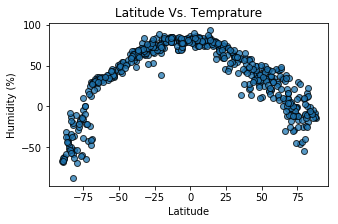

<Figure size 432x288 with 0 Axes>

In [85]:
plt.figure(figsize=(5,3))
plt.scatter(data["Lat"],data["Temperature"],marker ="o", edgecolors="black", alpha=0.75)
plt.title("Latitude Vs. Temprature")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
fig = plt.show()
plt.tight_layout()

In [76]:
plt.savefig("Temp.png")

<Figure size 432x288 with 0 Axes>

## Observation:
Temprature tend to decrease a the latitude increases. Temprature starts to decline at the attitude of zero in some cities.  

#### Latitude vs. Humidity Plot

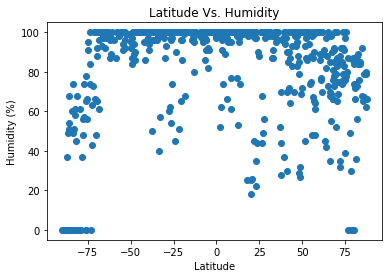

In [77]:
plt.scatter(data["Lat"],data["Humidity"],marker ="o")
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

In [78]:
plt.savefig("Hum.png")

<Figure size 432x288 with 0 Axes>

## Observation:
A) Percentage of humiditity in all almost all of the 550 cities increases as the latitude of increases (i.e. noral distribution of humidity was not observed as latitude increases). 

#### Latitude vs. Cloudiness Plot

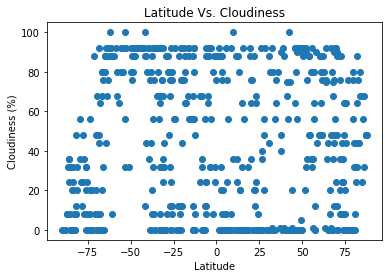

In [79]:
plt.scatter(data["Lat"],data["Clouds"],marker ="o")
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

In [80]:
plt.savefig("Cloud.png")

<Figure size 432x288 with 0 Axes>

## Observation:
A) Cloudness in the 550 cities is not consistent throughout the 550 cities - meaning that there are cities with high percentage cloud as the latitude incdeases. The distribution of couldness in the sities was not normal.

#### Latitude vs. Wind Speed Plot

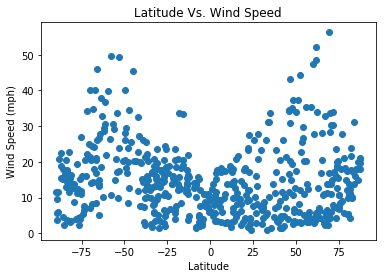

In [81]:
plt.scatter(data["Lat"], data["Wind Speed"],marker ="o")
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

In [82]:
plt.savefig("Wind Speed.png")

<Figure size 432x288 with 0 Axes>

## Observation
A) The windespeed in the 500 is hgiher as the latutude increases. The lower the latitude the higher the wind speed.

In [73]:
#Output File (CSV)
data.to_csv("C:/Users/Sisay/Desktop/Output/data1.csv")
